In [115]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import re
import numpy as np
from wordcloud import WordCloud
import seaborn as sns


In [117]:
Año = pd.read_csv('Año.csv')
Tripulacion = pd.read_csv('Tripulacion.csv')
Hora = pd.read_csv('Hora.csv')
Operador = pd.read_csv('Operador.csv')
detalle_Trip = pd.read_csv('Tripulaciondetallada.csv')
Muerte_tierra = pd.read_csv('Muerte_tierra.csv')
descripcion = pd.read_csv('descripcion.csv')
Ruta = pd.read_csv('Ruta.csv')

In [22]:
Año.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  5008 non-null   int64
 1   No.         5008 non-null   int64
 2   año         5008 non-null   int64
dtypes: int64(3)
memory usage: 117.5 KB


In [49]:
accidentes_año = Año['año'].value_counts().sort_index()

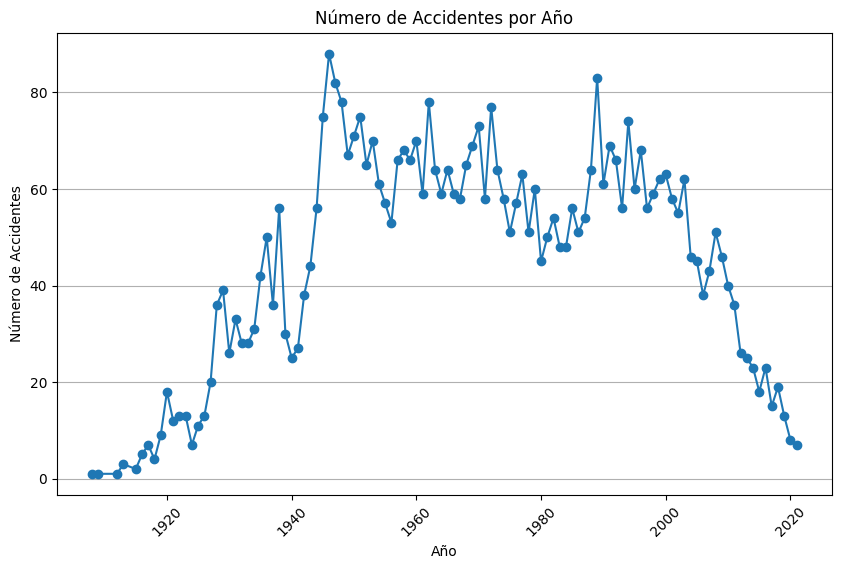

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(accidentes_año.index, accidentes_año.values, marker='o', linestyle='-')
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.title('Número de Accidentes por Año')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Muestra el gráfico de líneas
plt.show()

In [51]:
año_mas_accidentes = accidentes_año.idxmax()
cantidad_mas_accidentes = accidentes_año.max()
año_menos_accidentes = accidentes_año.idxmin()
cantidad_menos_accidentes = accidentes_año.min()
años_presentes = Año['año'].unique()
año_min = años_presentes.min()
año_max = años_presentes.max()
rango_años = range(año_min, año_max + 1)
años_sin_accidentes = [año for año in rango_años if año not in años_presentes]


print(f"Año con más accidentes: {año_mas_accidentes} ({cantidad_mas_accidentes} accidentes)")
print(f"Año con menos accidentes: {año_menos_accidentes} ({cantidad_menos_accidentes} accidentes)")
print(f'los años sin accidentes{años_sin_accidentes}')

Año con más accidentes: 1946 (88 accidentes)
Año con menos accidentes: 1908 (1 accidentes)
los años sin accidentes[1910, 1911, 1914]


Esta data contiene informacion al respecto de accidentes aereos en los años comprendidos entre 1908 y 2021. Los datos muestran que con 88 registros el año 1946, es en el que mayor hechos se presentaros y el año con menor hechos fue 1908 con un solo accidente. además los años que no tuvieron accidentes entre los años presentes en el conjunto de datos fueron 1910, 1911, 1914

HORA

In [54]:
conteo_franjas = Hora['FranjaHoraria'].value_counts()
franja_mas_accidentes = conteo_franjas.idxmax()
franja_menos_accidentes = conteo_franjas.idxmin()
cantidad_accidentes = conteo_franjas.max()
cantidad_accidentes_min = conteo_franjas.min()

print('franja horaria con mas accidentes',franja_mas_accidentes, 'con un total de', cantidad_accidentes)
print('franja horaria con menos accidentes',franja_menos_accidentes, 'con un total de', cantidad_accidentes_min)

franja horaria con mas accidentes 11 con un total de 211
franja horaria con menos accidentes 5 con un total de 62


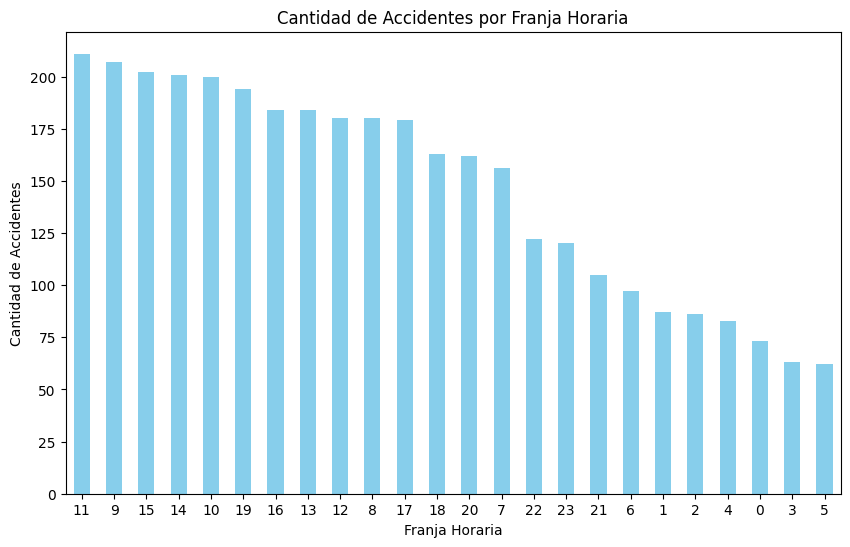

In [55]:
conteo_franjas = Hora['FranjaHoraria'].value_counts()

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))
conteo_franjas.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Accidentes por Franja Horaria')
plt.xlabel('Franja Horaria')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=0)
plt.show()

Con respecto a las horas en que ocurrieron los hechos, de 5008 accidentes la data disponibilizaba de 3501. Los siniestros aereos han ocurrido en todas las franjas horarias, donde la frannja horaria de las 11 es la cuenta con mayor cantidad (211) y la de las 05 la de menor (62)

OPERADOR

In [57]:
conteo_operador = Operador['OperadOR'].value_counts()
operador_mas_accidentes = conteo_operador.idxmax()
operador_menos_accidentes = conteo_operador.idxmin()
cantidad_accidentes = conteo_operador.max()
cantidad_accidentes_min = conteo_operador.min()

print('El operador con mas accidentes',operador_mas_accidentes, 'con un total de', cantidad_accidentes)
print('El operador con menos accidentes',operador_menos_accidentes, 'con un total de', cantidad_accidentes_min)

print('Los 5 operadores con mas accidentes', Operador['OperadOR'].value_counts().head(5))

El operador con mas accidentes Aeroflot con un total de 253
El operador con menos accidentes Air Taxi - Bohemia Inc. con un total de 1
Los 5 operadores con mas accidentes OperadOR
Aeroflot                     253
Military - U.S. Air Force    141
Air France                    74
Deutsche Lufthansa            63
United Air Lines              44
Name: count, dtype: int64


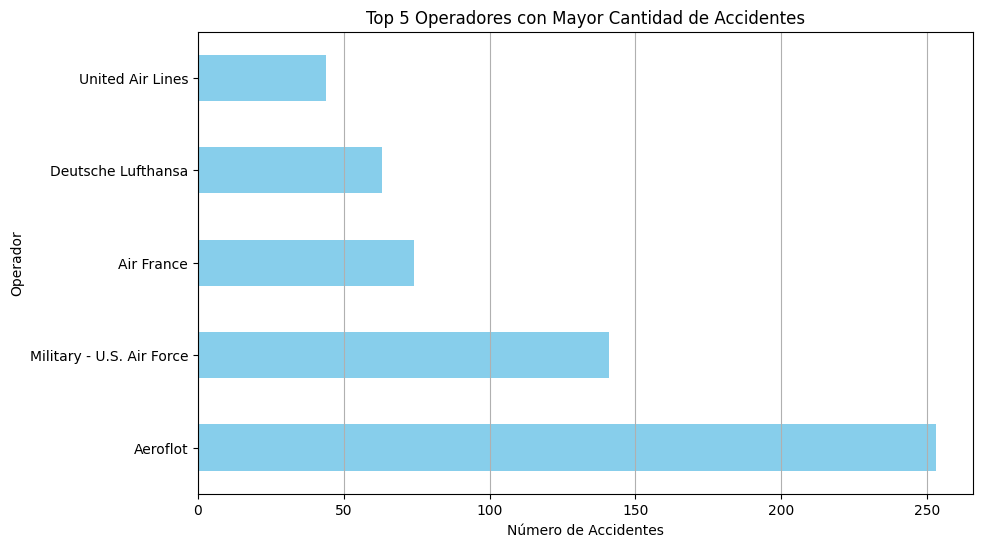

In [58]:
conteo_operador = Operador['OperadOR'].value_counts().head(5)

# Crear un gráfico de barras horizontales
plt.figure(figsize=(10, 6))
conteo_operador.plot(kind='barh', color='skyblue')
plt.ylabel('Operador')
plt.xlabel('Número de Accidentes')
plt.title('Top 5 Operadores con Mayor Cantidad de Accidentes')
plt.grid(axis='x')

# Muestra el gráfico de barras horizontales
plt.show()

La data tiene diponible 4998 registro acerca de los operadores involucrados en accidentes aereos, los datos miestran que la aerolínea de bandera y la aerolínea más grande de Rusia 'Aeroflot' ha tenido un gran numero de accidentes, con un total de 253 es el mayor cantidad en los registros, ademas otros operadores como 'Military - U.S. Air Force'(141), 'Air France'(74), 'Deutsche Lufthansa'(63) y 'United Air Lines'(44), son los 5 operadores con mayor hechos. 

TRIPULACION

In [23]:
Tripulacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4991 entries, 0 to 4990
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Unnamed: 0              4991 non-null   int64
 1   No.                     4991 non-null   int64
 2   all_aboard              4991 non-null   int64
 3   cantidad de fallecidos  4991 non-null   int64
dtypes: int64(4)
memory usage: 156.1 KB


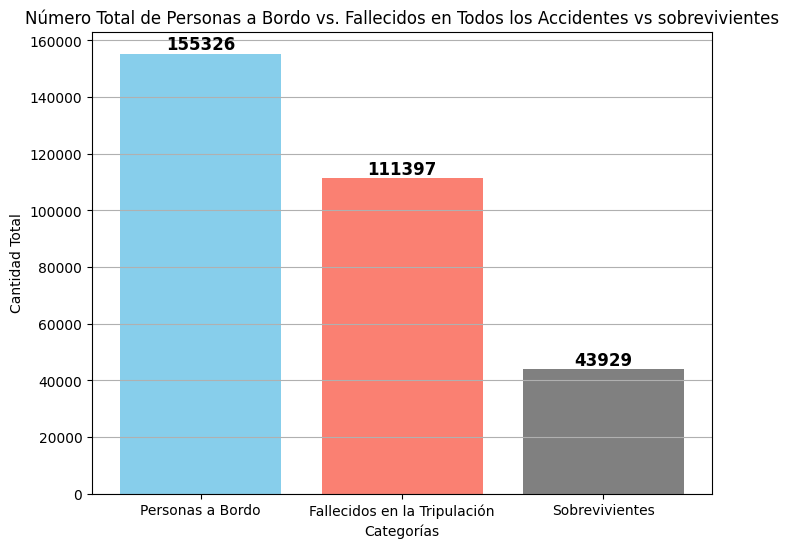

In [83]:
total_pasajeros = Tripulacion['all_aboard'].sum()
total_fallecidos_tripulacion = Tripulacion['cantidad de fallecidos'].sum()
sobrevivientes = total_pasajeros - total_fallecidos_tripulacion

# Crear un gráfico de barras para mostrar los totales
plt.figure(figsize=(8, 6))
categorias = ['Personas a Bordo', 'Fallecidos en la Tripulación', 'Sobrevivientes']
valores = [total_pasajeros, total_fallecidos_tripulacion,sobrevivientes ]

plt.bar(categorias, valores, color=['skyblue', 'salmon','gray'])
plt.xlabel('Categorías')
plt.ylabel('Cantidad Total')
plt.title('Número Total de Personas a Bordo vs. Fallecidos en Todos los Accidentes vs sobrevivientes')

# Mostrar el valor encima de cada barra
for i, v in enumerate(valores):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.grid(axis='y')

# Mostrar el gráfico de barras
plt.show()


En este grafico se evalua de manera general las personas fallecidas en relacion a la cantidad de personas abordo, con la informacion diponible de 4991 accidentes aereos, en las que 155.326 personas abordaron una aereonave durante estos años, 111.396 fallecieron lo que corresponde a mas del 70%, de personas  abordo. ademas segun los datos hubo un total de 43.929 de sobrevivientes. 

TRIPULACION DETALLADA

In [81]:
detalle_Trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4765 entries, 0 to 4764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   No.              4765 non-null   int64
 1   Trip_abord       4765 non-null   int64
 2   Pasajeros        4765 non-null   int64
 3   Personal         4765 non-null   int64
 4   Total_Falle      4765 non-null   int64
 5   Pasajeros_falle  4765 non-null   int64
 6   Personal_falle   4765 non-null   int64
dtypes: int64(7)
memory usage: 260.7 KB


In [75]:
detalle_Trip=detalle_Trip.drop('Unnamed: 0', axis=1)

In [76]:
detalle_Trip.head()

,No.,Trip_abord,Pasajeros,Personal,Total_Falle,Pasajeros_falle,Personal_falle
0,0,2,1,1,1,1,0
1,1,1,0,1,1,0,0
2,2,5,0,5,5,0,5
3,3,1,0,1,1,0,1
4,6,41,0,41,17,0,17


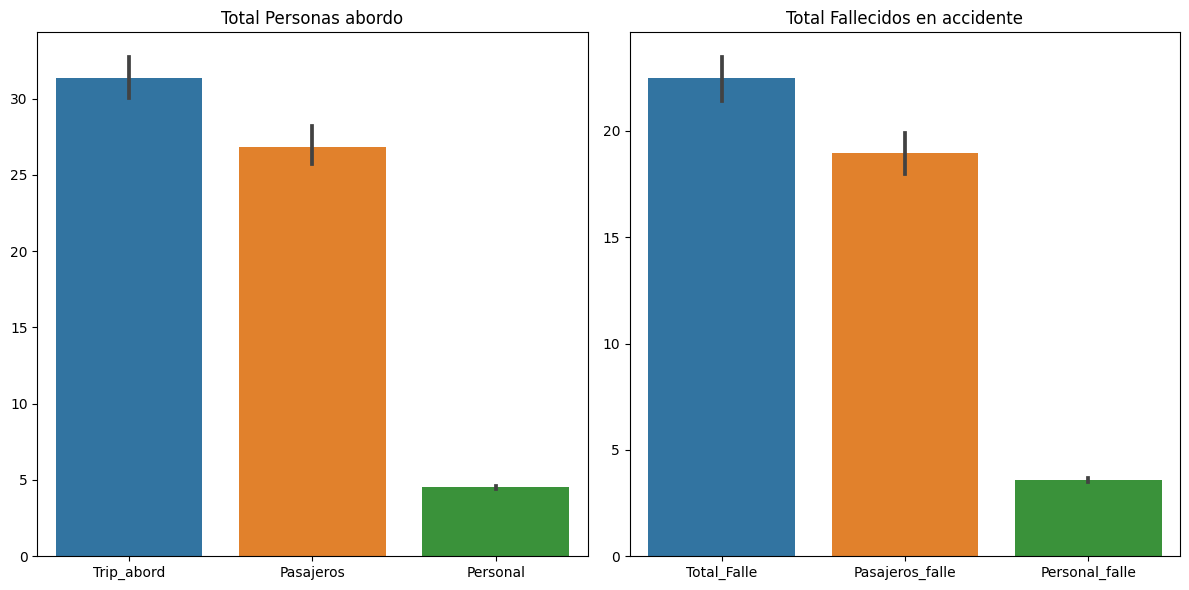

In [67]:
Personas_abordo = detalle_Trip.iloc[:, 1:4]  # Excluye la columna "No."

# Crear un DataFrame separado para las demás columnas
Total_Fallecidos = detalle_Trip.iloc[:, 4:]

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras agrupadas para las primeras tres columnas
plt.subplot(1, 2, 1)
sns.barplot(data=Personas_abordo)
plt.title('Total Personas abordo')

# Crear el gráfico de barras agrupadas para las demás columnas
plt.subplot(1, 2, 2)
sns.barplot(data=Total_Fallecidos)
plt.title('Total Fallecidos en accidente')

# Ajustar el diseño de los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Esta visualizacion muestra la distribuccion de los valores en cada columna, por un lado los campos de las personas abordo de las aeronaves: Trip_abord la cantidad de personas abordo, los pasajeros y el personal laboral del avion y por el otro lado total de personas fallecidas en los accidentes, los pasajeros y el personal.
La altura de cada barra en el gráfico de barras representa la frecuencia o el conteo de valores que caen en un rango o categoría específica dentro de esa columna   

In [92]:
total_personas_fallecidas = detalle_Trip['Total_Falle'].sum()

print('Total de personas fallecidas', total_personas_fallecidas)

Total de personas fallecidas 107126


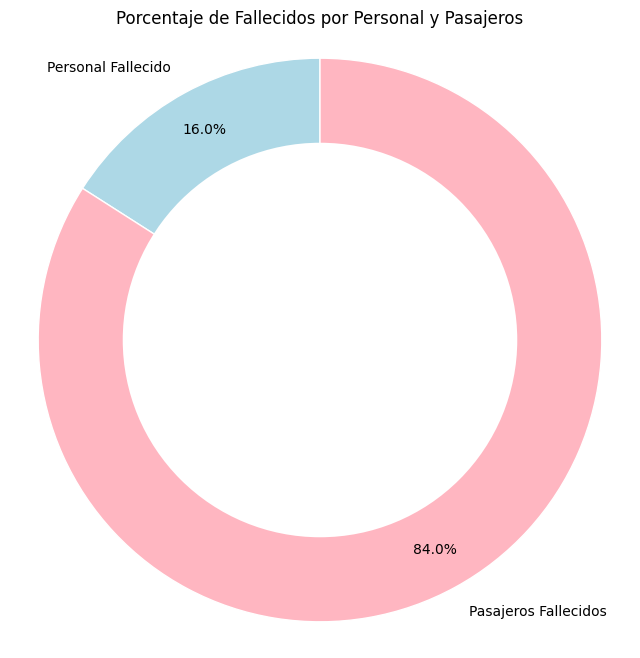

In [103]:
# Número total de personas fallecidas en los accidentes
total_personas_fallecidas = detalle_Trip['Total_Falle'].sum()

# Número de personas fallecidas que eran del personal
personas_fallecidas_del_personal = detalle_Trip['Personal_falle'].sum()

# Número de personas fallecidas que no eran del personal
personas_fallecidas_pasajeros = total_personas_fallecidas - personas_fallecidas_del_personal

# Etiquetas para el gráfico
etiquetas = ['Personal Fallecido', 'Pasajeros Fallecidos']

# Valores correspondientes a las etiquetas
valores = [personas_fallecidas_del_personal, personas_fallecidas_pasajeros]

# Colores para las porciones del gráfico
colores = ['lightblue', 'lightpink']

# Crear el gráfico de donut
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90, pctdistance=0.85,
        wedgeprops=dict(width=0.4, edgecolor='w'))

# Dibujar un círculo en el centro del gráfico para hacerlo parecer un donut
centro_circulo = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_circulo)

plt.title('Porcentaje de Fallecidos por Personal y Pasajeros')
plt.axis('equal')  # Para asegurarse de que el gráfico sea un círculo

# Mostrar el gráfico de donut
plt.show()


En esta visualizacion se ve representada una data correspondiente a 4675 accidentes, con un total de personas fallecidas 107.126 que representan en 84% a Pasajeros y 16% a personal laboral del avion.

In [69]:
Muerte_tierra['ground'].describe()

count    4964.000000
mean        1.718372
std        55.495544
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2750.000000
Name: ground, dtype: float64

Observamos la informacion estadistica del campo ground, en el que muestran datos a destacar como: hay 4964 registros disponibles acerca de accidentes, valor min, media, desviacion estandar,percentiles y un valor maximo de 2750.

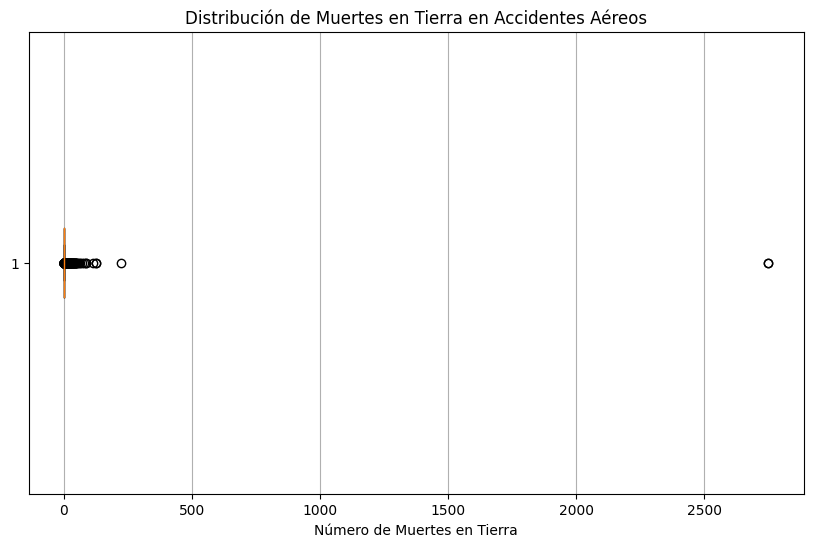

In [70]:
# Creamos un boxplot con los datos
plt.figure(figsize=(10, 6))
plt.boxplot(Muerte_tierra['ground'], vert=False)
plt.xlabel('Número de Muertes en Tierra')
plt.title('Distribución de Muertes en Tierra en Accidentes Aéreos')
plt.grid(axis='x')
plt.show()

Esta visualizacion muestra la distribución de las muertes en tierra en los accidentes aéreos. como se puede observar identifica la dispersion de los datos y un valor atipico, especificamente 2.750 personas murieron en tierra en el acto terrorista del 11 de septiembre, por el impacto de dos avioenes de los operadores American Airlines y United Air Lines con 92 y 65 respectivamente, personas abordo segun los datos.

DESCRIPCION

In [72]:
descripcion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5008 non-null   int64 
 1   No.         5008 non-null   int64 
 2   summary     5008 non-null   object
 3   año         5008 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 156.6+ KB


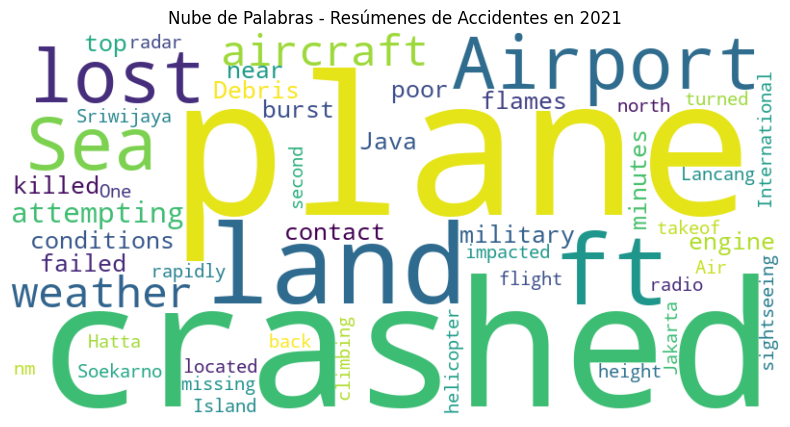

In [73]:
ultimo_año = descripcion['año'].max()
descripcion_filtrada = descripcion[descripcion['año'] == ultimo_año]

# Concatenar todos los resúmenes en una sola cadena
text = ' '.join(descripcion_filtrada['summary'])

# Crear una nube de palabras
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(text)

# Mostrar la nube de palabras en una figura
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Nube de Palabras - Resúmenes de Accidentes en {ultimo_año}')
plt.show()

La nube de palabras nos muestra las palabras que mas resaltan en la descripcion, como sabemos aqui se resume o describe la situacion del accidente. Para esta oportunidad se le aplica la nube de palabra filtrado en el ultimo año de accidentes como resultado se destacan palabras como 'crashed', 'lost','missing', con la de mayor frecuencia de aparicion, es importante debido que se puede establecer una similitud con las causas del accidente.

# PREGUNTAS SOBRE LOS ACCIDENTES

# Cual es el total de muertes registradas, en el año con mas accidentes ocurridos?


In [129]:
personal_año = pd.merge(Año, Tripulacion, on='No.')


In [149]:
personal_año.describe()

,No.,año,all_aboard,cantidad de fallecidos
count,4991.000000,4991.000000,4991.000000,4991.000000
mean,2507.790022,1970.924264,31.121218,22.319575
std,1445.182312,24.690693,45.479965,35.025119
min,0.000000,1908.000000,0.000000,0.000000
25%,1256.500000,1951.000000,7.000000,4.000000
50%,2510.000000,1970.000000,16.000000,11.000000
75%,3759.500000,1992.000000,35.000000,25.000000
max,5007.000000,2021.000000,644.000000,583.000000


In [138]:
personal_año = personal_año.drop(['Unnamed: 0_x','Unnamed: 0_y'], axis=1)

In [99]:
año_mas_accidentes = personal_año['año'].value_counts().idxmax()

# Filtrar los datos para obtener solo el año con más accidentes
data_año_mas_accidentes = personal_año[personal_año['año'] == año_mas_accidentes]
# Calcular el total de personas muertas en ese año
total_muertes_en_año_mas_accidentes = data_año_mas_accidentes['cantidad de fallecidos'].sum()
total_abordo_en_año_mas_accidentes = data_año_mas_accidentes['all_aboard'].sum()

print(f"El año con más accidentes fue: {año_mas_accidentes} y tuvo un total de {total_abordo_en_año_mas_accidentes} personas abordo y un total {total_muertes_en_año_mas_accidentes} muertes totales")


El año con más accidentes fue: 1946 y tuvo un total de 1649 personas abordo y un total 1327 muertes totales


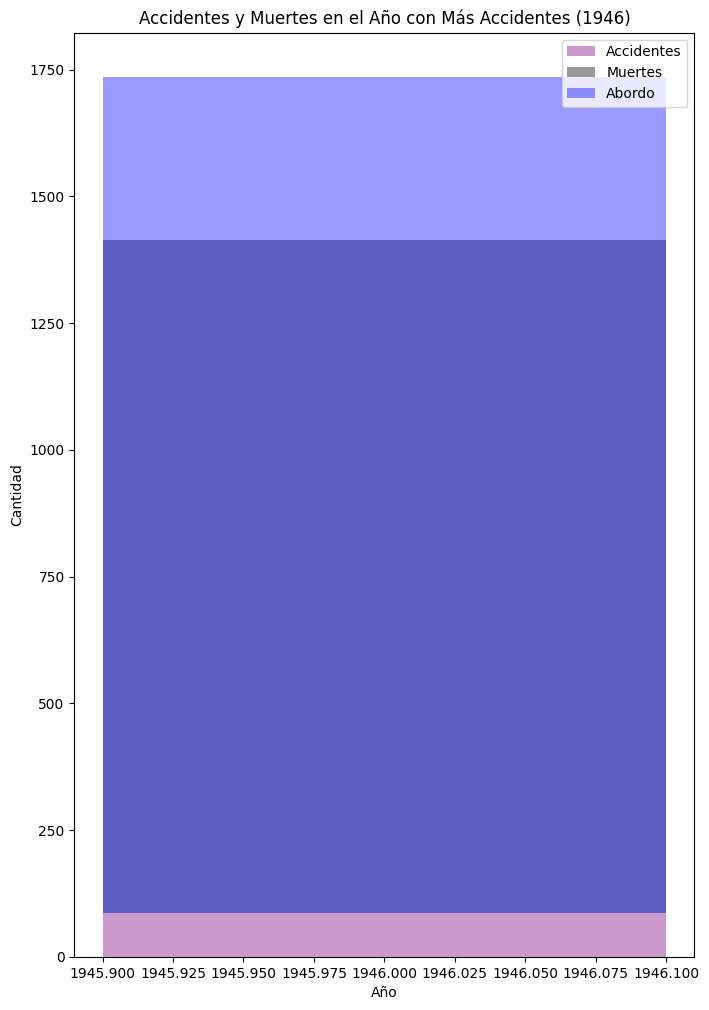

In [98]:

# Calcular el total de accidentes en ese año
total_accidentes_en_año_mas_accidentes = len(data_año_mas_accidentes)

# Crear un DataFrame para el gráfico
data_grafico = pd.DataFrame({
    'Año': [año_mas_accidentes],
    'Accidentes': [total_accidentes_en_año_mas_accidentes],
    'Muertes': [total_muertes_en_año_mas_accidentes],
    'Abordo': [total_abordo_en_año_mas_accidentes]
})

# Crear el gráfico de barras apiladas
plt.figure(figsize=(8, 12))
plt.bar(data_grafico['Año'], data_grafico['Accidentes'], label='Accidentes', color='purple', alpha=0.4, width=0.2)
plt.bar(data_grafico['Año'], data_grafico['Muertes'], bottom=data_grafico['Accidentes'], label='Muertes', color='black', alpha=0.4, width=0.2)
plt.bar(data_grafico['Año'], data_grafico['Abordo'], bottom=data_grafico['Accidentes'], label='Abordo', color='blue', alpha=0.4, width=0.2)
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title(f'Accidentes y Muertes en el Año con Más Accidentes ({año_mas_accidentes})')
plt.legend()

# Mostrar el gráfico
plt.show()


Como se puede observar la grafica de los 4.991 registros, el año 1946 es  el de mayor cantidad de accidentes, de los cuales  tuvo un total de 1649 personas abordo y un total 1327 muertes totales


# Que ocurrio en el accidente con mayor cantidad de fallecidos registrado?

In [140]:
descripcion_año = pd.merge(personal_año, descripcion, on='No.')


In [145]:
descripcion_año = descripcion_año.drop(['Unnamed: 0','año_y'], axis=1)

In [146]:
descripcion_año.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4991 entries, 0 to 4990
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   No.                     4991 non-null   int64 
 1   año_x                   4991 non-null   int64 
 2   all_aboard              4991 non-null   int64 
 3   cantidad de fallecidos  4991 non-null   int64 
 4   summary                 4991 non-null   object
dtypes: int64(4), object(1)
memory usage: 195.1+ KB


In [155]:
indice_max_fallecidos = descripcion_año['cantidad de fallecidos'].idxmax()
max_fallecidos = descripcion_año['cantidad de fallecidos'].max()

# Extrae el "summary" y el año correspondiente utilizando el índice encontrado
summary_max_fallecidos = descripcion_año.loc[indice_max_fallecidos, 'summary']
año_max_fallecidos = descripcion_año.loc[indice_max_fallecidos, 'año_x']

# Imprime el resultado
print("El registro con la mayor cantidad de fallecidos:")
print("Summary:", summary_max_fallecidos)
print("Año:", año_max_fallecidos)
print('la cantidad de fallecidos fue:', max_fallecidos)

El registro con la mayor cantidad de fallecidos:
Summary: Both aircraft were diverted to Tenerife because of a bombing at Las Palmas Airport. After an extended delay,  both planes were instructed to back track up the runway. The KLM plane reached its takeoff point while the Pan Am plane was still on the runway. The Pan Am plane continued up the runway missing the taxiway turnout. There was heavy fog on the runway. The KLM plane began its takeoff roll without permission with the Pan Am plane still on the runway. The controller and Pan Am pilot each radioed a warning to the KLM plane, but were not heard because the simultaneous transmissions interfered with each other.The KLM plane hit the Pan Am plane just as it was taking off. Both planes burst into flames.  KLM 234 + 14 crew,  Pan Am 326 + 9 crew killed. All aboard the KLM plane were killed. The KLM captain was their safety officer and for some months had  been training other pilots using a simulator, where getting takeoff permission 

En el año de 1977 en Tenerife, Canary Islands se presente el hecho con mayor cantidad de fallecidos, con 583 victimas. El accidente fue debido al choque de dos aviones.

# Cual es la decada con mayor fatalidad?

In [101]:
personal_año['Decada'] = (personal_año['año'] // 10) * 10

# Agrupar los datos por la columna "Decada" y sumar los fallecidos en cada década
fallecidos_por_decada = personal_año.groupby('Decada')['cantidad de fallecidos'].sum().reset_index()

# Renombrar las columnas para mayor claridad
fallecidos_por_decada.columns = ['Decada', 'Total de Fallecidos']

# Mostrar el resultado
print(fallecidos_por_decada)

    Decada  Total de Fallecidos
0     1900                    2
1     1910                  415
2     1920                  644
3     1930                 2046
4     1940                 8895
5     1950                11786
6     1960                16871
7     1970                19751
8     1980                16850
9     1990                15983
10    2000                11174
11    2010                 6447
12    2020                  533


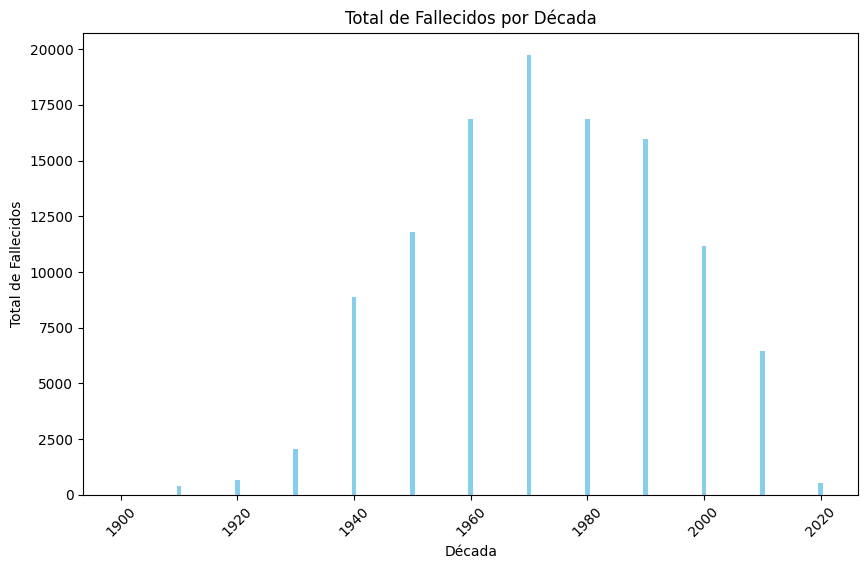

In [102]:
plt.figure(figsize=(10, 6))
plt.bar(fallecidos_por_decada['Decada'], fallecidos_por_decada['Total de Fallecidos'], color='skyblue')
plt.xlabel('Década')
plt.ylabel('Total de Fallecidos')
plt.title('Total de Fallecidos por Década')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad

# Mostrar el gráfico
plt.show()

En los registros de 4991 accidentes, la decada de los 70 es la mas fatal por tener la mayor cantidad de muertes con un 19.751.

# Cual es son los Operadores con mayores registros de fallecidos aereos en cada decada?


In [ ]:
operador_año = pd.merge(personal_año, Operador, on='No.')


In [110]:
operador_año = operador_año.drop(['Unnamed: 0_x','Unnamed: 0_y','Década','Unnamed: 0'], axis=1)
operador_año.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   No.                     4981 non-null   int64 
 1   año                     4981 non-null   int64 
 2   all_aboard              4981 non-null   int64 
 3   cantidad de fallecidos  4981 non-null   int64 
 4   Decada                  4981 non-null   int64 
 5   OperadOR                4981 non-null   object
dtypes: int64(5), object(1)
memory usage: 233.6+ KB


In [111]:
operador_año['Decada'] = (operador_año['año'] // 10) * 10

# Agrupar los datos por "Decada" y "OperadOR" y sumar los fallecidos en cada combinación
fallecidos_por_decada_operador = operador_año.groupby(['Decada', 'OperadOR'])['cantidad de fallecidos'].sum().reset_index()

# Encontrar el operador con la mayor cantidad de fallecidos en cada década
operador_max_fallecidos_por_decada = fallecidos_por_decada_operador.loc[fallecidos_por_decada_operador.groupby('Decada')['cantidad de fallecidos'].idxmax()]

# Mostrar el resultado
print(operador_max_fallecidos_por_decada)

      Decada                         OperadOR  cantidad de fallecidos
0       1900             Military - U.S. Army                       1
5       1910           Military - German Navy                     307
52      1920           Military - French Navy                      52
131     1930               Deutsche Lufthansa                     165
373     1940  Military - U.S. Army Air Forces                    1070
619     1950        Military - U.S. Air Force                    1343
759     1960                         Aeroflot                    1893
1090    1970                         Aeroflot                    3382
1451    1980                         Aeroflot                    1855
1930    1990          China Airlines (Taiwan)                     468
2335    2000                American Airlines                     417
2836    2010                Malaysia Airlines                     537
2958    2020   Ukraine International Airlines                     176


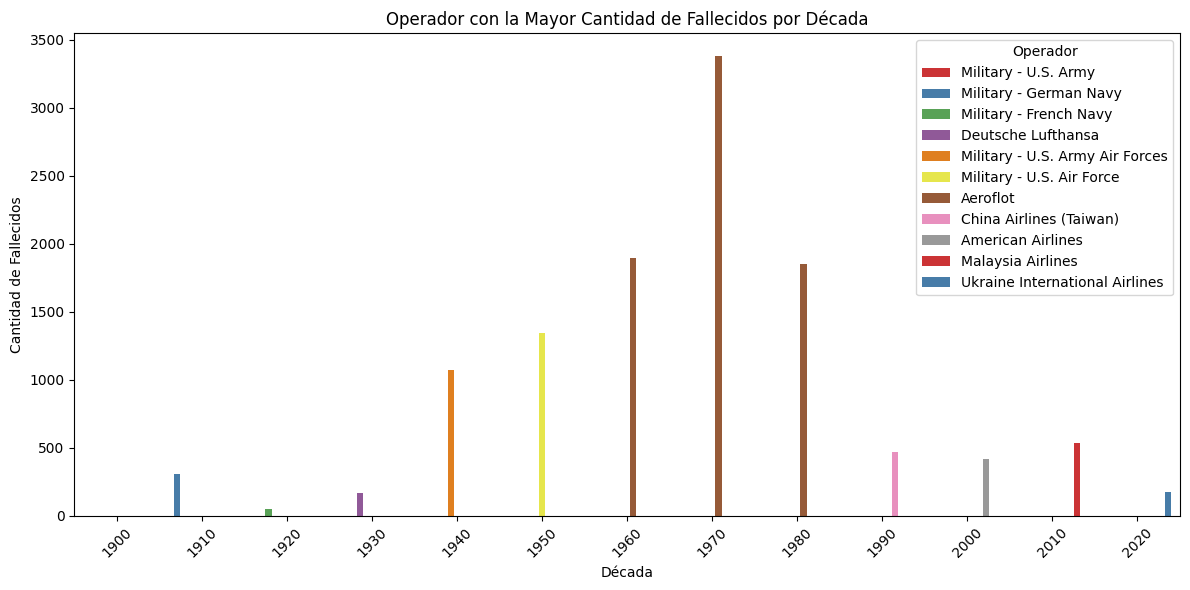

In [112]:
plt.figure(figsize=(12, 6))
sns.barplot(data=operador_max_fallecidos_por_decada, x='Decada', y='cantidad de fallecidos', hue='OperadOR', palette='Set1')
plt.xlabel('Década')
plt.ylabel('Cantidad de Fallecidos')
plt.title('Operador con la Mayor Cantidad de Fallecidos por Década')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad

# Mostrar el gráfico
plt.legend(title='Operador', loc='upper right')
plt.tight_layout()
plt.show()

En esta visualizacion disponemos de una data con 4981 registros, como observamos en la grafica el operador 'Aeroflot' es la aerolínea de bandera de la Federación de Rusia en un analisis anterior se destaco como la lider de la lista con mas accidentes registrados y en este apartado desfortunamente tambien es el operador con mas fatalidad registrado para las decadas de los 60, 70 y 80.

# Cual era la ruta del accidente con mayor cantidad de fallecidos por decadas?


In [119]:
Ruta_año = pd.merge(personal_año, Ruta, on='No.')


In [121]:
Ruta_año = Ruta_año.drop(['Unnamed: 0_x','Unnamed: 0_y','Década','Unnamed: 0'], axis=1)
Ruta_año.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4986 entries, 0 to 4985
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   No.                     4986 non-null   int64 
 1   año                     4986 non-null   int64 
 2   all_aboard              4986 non-null   int64 
 3   cantidad de fallecidos  4986 non-null   int64 
 4   Decada                  4986 non-null   int64 
 5   Ruta                    4986 non-null   object
dtypes: int64(5), object(1)
memory usage: 233.8+ KB


In [122]:
Ruta_año['Decada'] = (Ruta_año['año'] // 10) * 10

# Agrupar los datos por "Decada" y "Ruta" y sumar los fallecidos en cada combinación
fallecidos_por_decada_ruta = Ruta_año.groupby(['Decada', 'Ruta'])['cantidad de fallecidos'].sum().reset_index()

# Encontrar la ruta con la mayor cantidad de fallecidos en cada década
ruta_max_fallecidos_por_decada = fallecidos_por_decada_ruta.loc[fallecidos_por_decada_ruta.groupby('Decada')['cantidad de fallecidos'].idxmax()]

# Mostrar el resultado
print(ruta_max_fallecidos_por_decada)

      Decada                                   Ruta  cantidad de fallecidos
0       1900                    Fort Myer, Virginia                       1
15      1910             Near Johannisthal, Germany                      28
152     1920             Over the Mediterranean Sea                      52
421     1930               Off Barnegat, New Jersey                      73
770     1940                  Near Bogota, Colombia                      85
1628    1950            Tachikawa AFB, Tokyo, Japan                     129
1714    1960                           Cairo, Egypt                     207
2804    1970               Tenerife, Canary Islands                     583
3066    1980  Mt. Osutaka, near Ueno Village, Japan                     520
3654    1990              Near Charkhi Dadri, India                     349
4292    2000                     Near Shahdad, Iran                     275
4508    2010                       Hrabove, Ukraine                     298
4703    2020

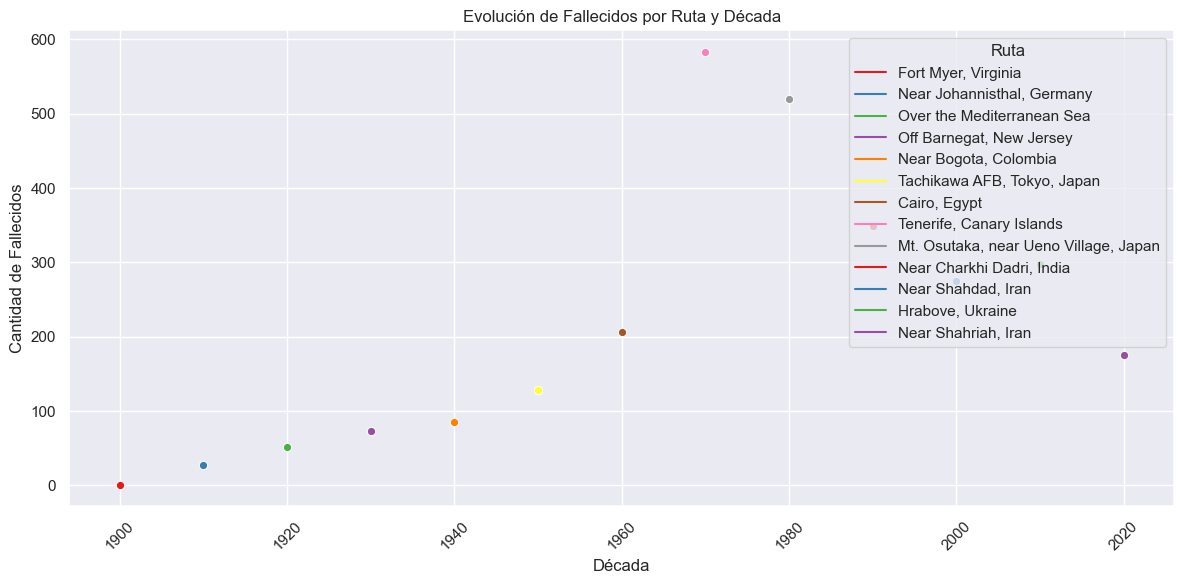

In [128]:
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
sns.lineplot(data=ruta_max_fallecidos_por_decada, x='Decada', y='cantidad de fallecidos', hue='Ruta', palette='Set1', marker='o')
plt.xlabel('Década')
plt.ylabel('Cantidad de Fallecidos')
plt.title('Evolución de Fallecidos por Ruta y Década')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad

# Mostrar el gráfico
plt.legend(title='Ruta', loc='upper right')
plt.tight_layout()
plt.show()

En la grafica obseevamos la ruta con mayor fatalidad por decadas, se destaca que Tenerife, Canary Islands en la decada de 1970 la de mayor muerte, seguida por Mt. Osutaka, near Ueno Village, Japan en la decada de los 80